In [1]:
from UTILITY_quickstart import *

importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml")

In [2]:
csrTF = True


bunchCount = importedDefaultSettings["bunchCount"]

tao = initializeTao(
    inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    
    csrTF = csrTF,
    numMacroParticles=1e5,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

setLattice(tao, **importedDefaultSettings)
launchTwissCorrection(tao)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 100000.0
Beam created, written to /tmp/beams/activeBeamFile_6238222567642532533.h5, and reinit to tao
No evalElement provided. Assuming golden lattice PR10571
Optimization Results:
Optimal Parameters: [28.77865964 13.39705392 23.51276157 16.83077823]
Objective Function Value at Optimal Parameters: 3.875225216013324e-12
Number of Iterations: 354
Converged: True


In [4]:

tao.cmd(f"set ele TCY15280 VOLTAGE = 20e6")
getMatrix(tao, "IM14890", "PR15944", print = True);

-1.560789,-6.216556,0.000000,-0.000000,0.000000,0.000000
-0.060959,-0.755207,0.000000,-0.000000,-0.000000,-0.000000
0.000000,0.000000,0.618145,-12.150313,11.910244,0.000003
-0.000000,-0.000000,0.057323,0.167061,-0.764017,-0.000000
0.000000,0.000000,-0.000001,0.000006,1.000000,0.000001
0.000000,0.000000,-1.155005,7.293305,0.021611,0.799762


In [ ]:
trackStart = "IM14890"
trackEnd = "PR15944"

trackBeam(tao, trackEnd = trackStart, **importedDefaultSettings)

PStart = getBeamAtElement(tao, trackStart)

makeBeamActiveBeamFile( PStart, tao = tao )

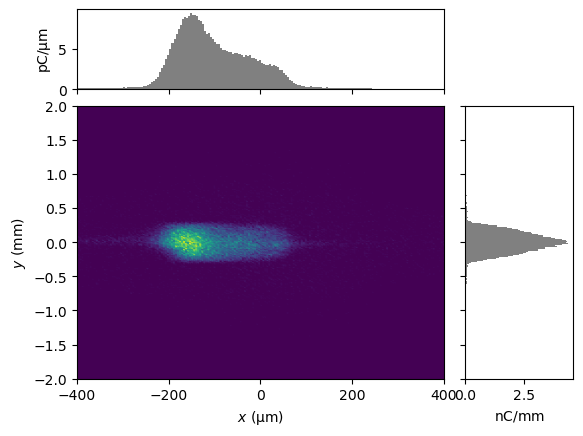

{'PDrive_median_x': -0.00011682374744243683,
 'PDrive_median_y': 3.9329846370586987e-07,
 'PDrive_median_xp': -1.3188040818438219e-05,
 'PDrive_median_yp': -2.0167035562513157e-08,
 'PDrive_sigmaSI90_x': 8.602121110050373e-05,
 'PDrive_sigmaSI90_y': 0.000145860832199767,
 'PDrive_sigmaSI90_z': 3.809226100749336e-05,
 'PDrive_sigmaSI90_xp': 1.2132750070687615e-05,
 'PDrive_sigmaSI90_yp': 5.649201414656043e-06,
 'PDrive_emitSI90_x': 8.495553441965848e-06,
 'PDrive_emitSI90_y': 3.325266006139886e-06,
 'PDrive_norm_emit_x': 5.608065130682132e-06,
 'PDrive_norm_emit_y': 1.7862809403576927e-06,
 'PDrive_charge_nC': 1.5996480000000006}

<Figure size 640x480 with 0 Axes>

In [4]:
tao.cmd(f"set ele TCY15280 VOLTAGE = 0e6")
tao.cmd(f"set ele TCY15280 PHI0 = {0/360.0}")

trackBeam(tao, trackStart = trackStart, trackEnd = trackEnd, **importedDefaultSettings)


P = getBeamAtElement(tao, trackEnd)
display(plotMod(P, 'x', 'y', bins=300, xlim = (-0.4e-3, 0.4e-3), ylim = (-2e-3,2e-3)))
plt.clf()

getBeamSpecs(P)

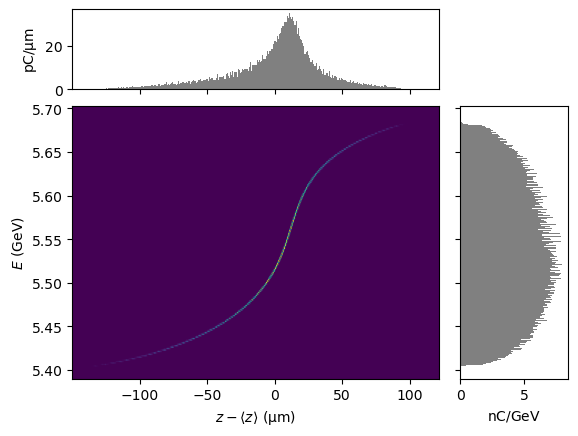

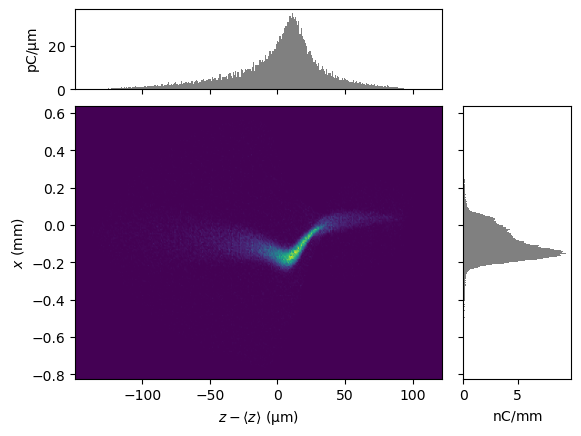

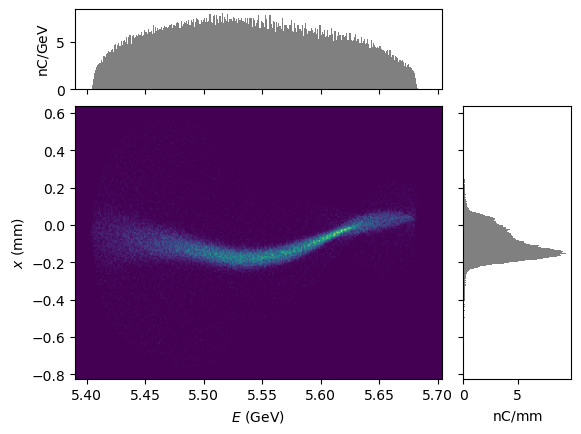

In [10]:
display(plotMod(P, 'delta_z', 'energy', bins=300))
display(plotMod(P, 'delta_z', 'x', bins=300))
display(plotMod(P, 'energy', 'x', bins=300))
plt.clf()

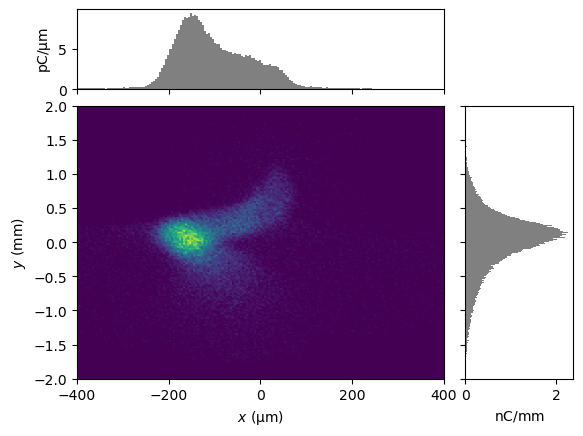

{'PDrive_median_x': -0.00011682336853627252,
 'PDrive_median_y': 6.506725109984025e-05,
 'PDrive_median_xp': -1.3188685194225299e-05,
 'PDrive_median_yp': -4.873163901593768e-06,
 'PDrive_sigmaSI90_x': 8.602098358750853e-05,
 'PDrive_sigmaSI90_y': 0.0004669646724520298,
 'PDrive_sigmaSI90_z': 3.809432268923016e-05,
 'PDrive_sigmaSI90_xp': 1.213143463030488e-05,
 'PDrive_sigmaSI90_yp': 2.975583085094271e-05,
 'PDrive_emitSI90_x': 8.493416604216065e-06,
 'PDrive_emitSI90_y': 2.495948334366772e-05,
 'PDrive_norm_emit_x': 5.608239160060693e-06,
 'PDrive_norm_emit_y': 5.093683297133464e-06,
 'PDrive_charge_nC': 1.5996480000000006}

In [7]:
tao.cmd(f"set ele TCY15280 VOLTAGE = 20e6")
tao.cmd(f"set ele TCY15280 PHI0 = {0/360.0}")

trackBeam(tao, trackStart = trackStart, trackEnd = trackEnd, **importedDefaultSettings)

P = getBeamAtElement(tao, trackEnd)
display(plotMod(P, 'x', 'y', bins=300, xlim = (-0.4e-3, 0.4e-3), ylim = (-2e-3,2e-3) ))
plt.clf()

getBeamSpecs(P)

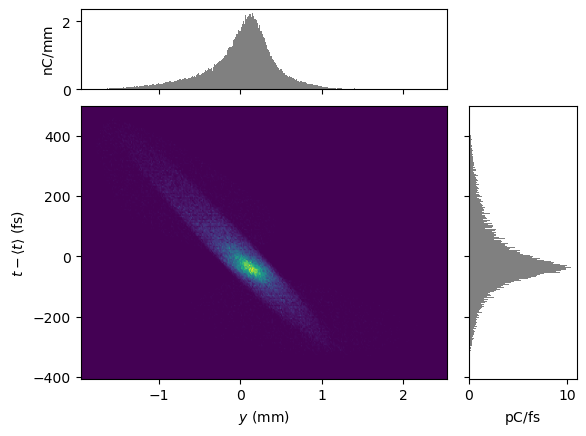

In [8]:
display(plotMod(P, 'y', 'delta_t', bins=300))

In [14]:
df = pd.DataFrame([P.y, P["delta_t"]])
df.to_csv("~/y_t.csv")

## Synthetic bunch length scan

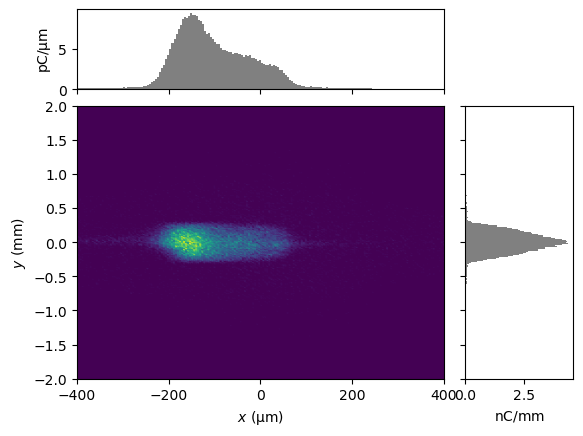

In [15]:
tao.cmd(f"set ele TCY15280 VOLTAGE = 0e6")
tao.cmd(f"set ele TCY15280 PHI0 = {0/360.0}")

trackBeam(tao, trackStart = trackStart, trackEnd = trackEnd, **importedDefaultSettings)


POff = getBeamAtElement(tao, trackEnd)

display(plotMod(POff, 'x', 'y', bins=300, xlim = (-0.4e-3, 0.4e-3), ylim = (-2e-3,2e-3)))
plt.clf()

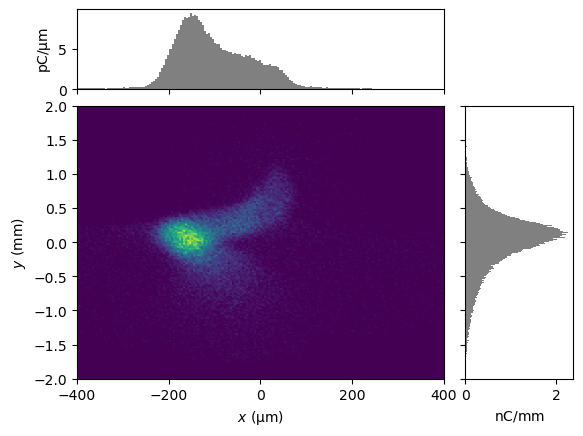

In [16]:
tao.cmd(f"set ele TCY15280 VOLTAGE = 20e6")
tao.cmd(f"set ele TCY15280 PHI0 = {0/360.0}")

trackBeam(tao, trackStart = trackStart, trackEnd = trackEnd, **importedDefaultSettings)


PPlus = getBeamAtElement(tao, trackEnd)

display(plotMod(PPlus, 'x', 'y', bins=300, xlim = (-0.4e-3, 0.4e-3), ylim = (-2e-3,2e-3)))
plt.clf()

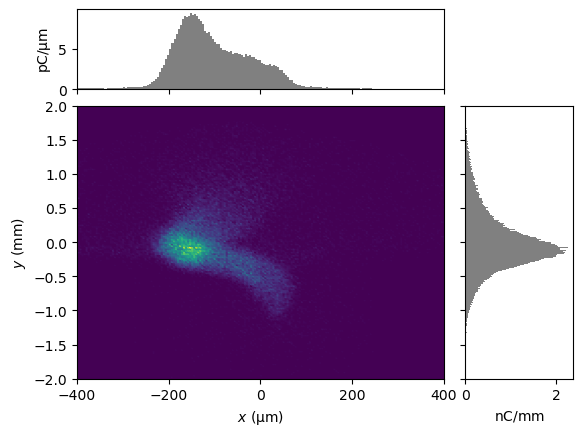

In [18]:
tao.cmd(f"set ele TCY15280 VOLTAGE = 20e6")
tao.cmd(f"set ele TCY15280 PHI0 = {180/360.0}")

trackBeam(tao, trackStart = trackStart, trackEnd = trackEnd, **importedDefaultSettings)


PMinus = getBeamAtElement(tao, trackEnd)

display(plotMod(PMinus, 'x', 'y', bins=300, xlim = (-0.4e-3, 0.4e-3), ylim = (-2e-3,2e-3)))
plt.clf()

In [21]:
print( POff["sigma_y"], PPlus["sigma_y"], PMinus["sigma_y"] ) 

0.00017569772361417219 0.00045615733489276516 0.00045642528507364844


In [24]:
print( POff["sigma_t"], PPlus["sigma_t"], PMinus["sigma_t"] ) 

1.2067535913559522e-13 1.2069369493154693e-13 1.2069375497799866e-13


In [25]:
print( POff["sigma_z"], PPlus["sigma_z"], PMinus["sigma_z"] ) 

3.617756253529285e-05 3.61830594686306e-05 3.6183077470103956e-05


In [26]:
print( smallestIntervalImpliedSigma(POff.y), smallestIntervalImpliedSigma(PPlus.y), smallestIntervalImpliedSigma(PMinus.y) ) 

0.00014586083223430113 0.00046696467216389843 0.0004666823417767756


In [27]:
print( smallestIntervalImpliedSigma(POff.t), smallestIntervalImpliedSigma(PPlus.t), smallestIntervalImpliedSigma(PMinus.t) ) 

1.2697420330928118e-13 1.2698107563647993e-13 1.2698195177564335e-13


In [29]:
df = pd.DataFrame([POff.y, PPlus.y, POff.t])
df.to_csv("~/yOff_yOn_t.csv")